In [455]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from subprocess import check_output
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from pandas.plotting import lag_plot
from datetime import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [456]:
warnings.filterwarnings('ignore')

In [457]:
data = pd.read_csv("/content/IOC.csv")
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,IOC,EQ,254.00,260.0,273.25,250.00,267.35,270.85,258.55,23700,6.127648e+11,NaN,NaN,NaN
1,2000-01-04,IOC,EQ,270.85,260.0,268.00,254.10,267.00,264.40,259.80,24400,6.339112e+11,NaN,NaN,NaN
2,2000-01-05,IOC,EQ,264.40,264.9,265.00,257.00,261.35,261.30,260.66,18900,4.926382e+11,NaN,NaN,NaN
3,2000-01-06,IOC,EQ,261.30,258.0,263.00,256.05,263.00,260.10,259.81,18150,4.715515e+11,NaN,NaN,NaN
4,2000-01-07,IOC,EQ,260.10,259.9,267.00,253.25,267.00,264.45,260.11,17650,4.590902e+11,NaN,NaN,NaN


In [458]:
data.drop(['Date'], axis=1, inplace=True)

In [459]:
print(data.head())
print(data.shape)
print(data.columns)

  Symbol Series  Prev Close   Open    High     Low    Last   Close    VWAP  \
0    IOC     EQ      254.00  260.0  273.25  250.00  267.35  270.85  258.55   
1    IOC     EQ      270.85  260.0  268.00  254.10  267.00  264.40  259.80   
2    IOC     EQ      264.40  264.9  265.00  257.00  261.35  261.30  260.66   
3    IOC     EQ      261.30  258.0  263.00  256.05  263.00  260.10  259.81   
4    IOC     EQ      260.10  259.9  267.00  253.25  267.00  264.45  260.11   

   Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0   23700  6.127648e+11     NaN                 NaN          NaN  
1   24400  6.339112e+11     NaN                 NaN          NaN  
2   18900  4.926382e+11     NaN                 NaN          NaN  
3   18150  4.715515e+11     NaN                 NaN          NaN  
4   17650  4.590902e+11     NaN                 NaN          NaN  
(5306, 14)
Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 

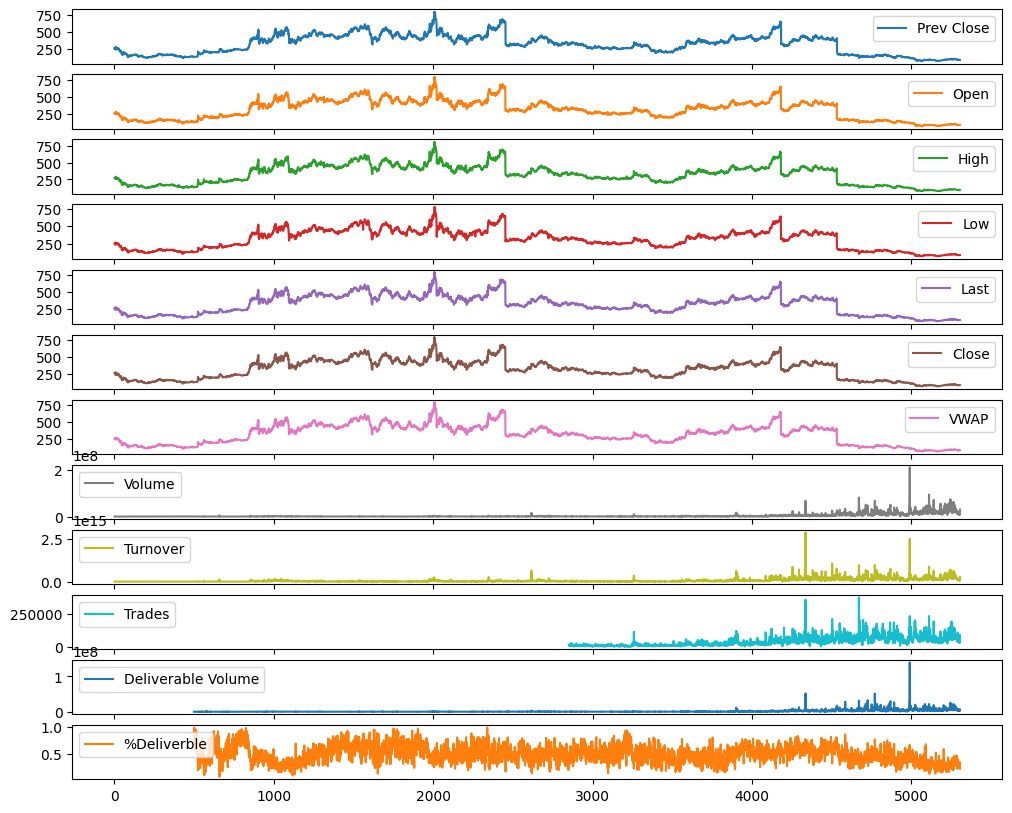

Symbol                   1
Series                   1
Prev Close            3926
Open                  2847
High                  3161
Low                   3251
Last                  3305
Close                 3927
VWAP                  4975
Volume                5292
Turnover              5306
Trades                2411
Deliverable Volume    4787
%Deliverble           3295
dtype: int64

In [460]:
data.plot(legend=True,subplots=True, figsize = (12, 10))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()


In [461]:
data.reset_index(drop=True, inplace=True)
#data.fillna(data.mean(), inplace=True)
data.head()


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,IOC,EQ,254.00,260.0,273.25,250.00,267.35,270.85,258.55,23700,6.127648e+11,NaN,NaN,NaN
1,IOC,EQ,270.85,260.0,268.00,254.10,267.00,264.40,259.80,24400,6.339112e+11,NaN,NaN,NaN
2,IOC,EQ,264.40,264.9,265.00,257.00,261.35,261.30,260.66,18900,4.926382e+11,NaN,NaN,NaN
3,IOC,EQ,261.30,258.0,263.00,256.05,263.00,260.10,259.81,18150,4.715515e+11,NaN,NaN,NaN
4,IOC,EQ,260.10,259.9,267.00,253.25,267.00,264.45,260.11,17650,4.590902e+11,NaN,NaN,NaN


     Symbol Series  Prev Close    Open    High     Low    Last   Close  \
0       IOC     EQ      254.00  260.00  273.25  250.00  267.35  270.85   
1       IOC     EQ      270.85  260.00  268.00  254.10  267.00  264.40   
2       IOC     EQ      264.40  264.90  265.00  257.00  261.35  261.30   
3       IOC     EQ      261.30  258.00  263.00  256.05  263.00  260.10   
4       IOC     EQ      260.10  259.90  267.00  253.25  267.00  264.45   
...     ...    ...         ...     ...     ...     ...     ...     ...   
5301    IOC     EQ       88.05   88.70   88.80   87.75   88.20   88.20   
5302    IOC     EQ       88.20   88.20   89.10   88.20   88.90   88.85   
5303    IOC     EQ       88.85   89.20   89.55   89.00   89.30   89.40   
5304    IOC     EQ       89.40   90.25   90.50   88.70   88.75   88.90   
5305    IOC     EQ       88.90   88.60   93.10   88.00   90.80   90.85   

        VWAP    Volume      Turnover   Trades  Deliverable Volume  %Deliverble  
0     258.55     23700  6.1276

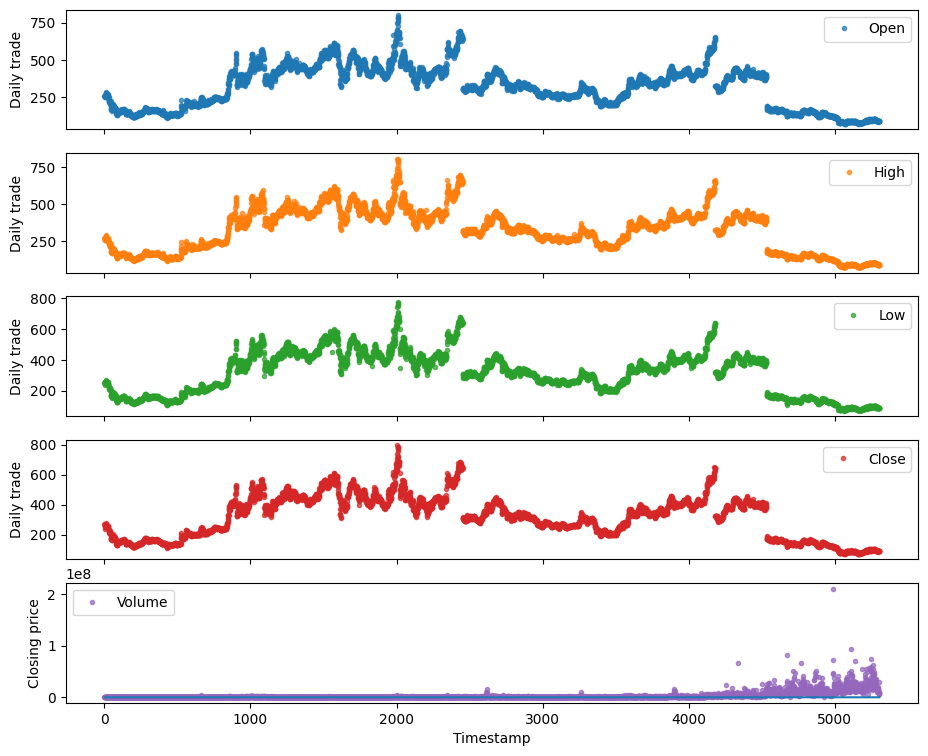

In [462]:

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)



In [463]:
data.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     509
%Deliverble            509
dtype: int64

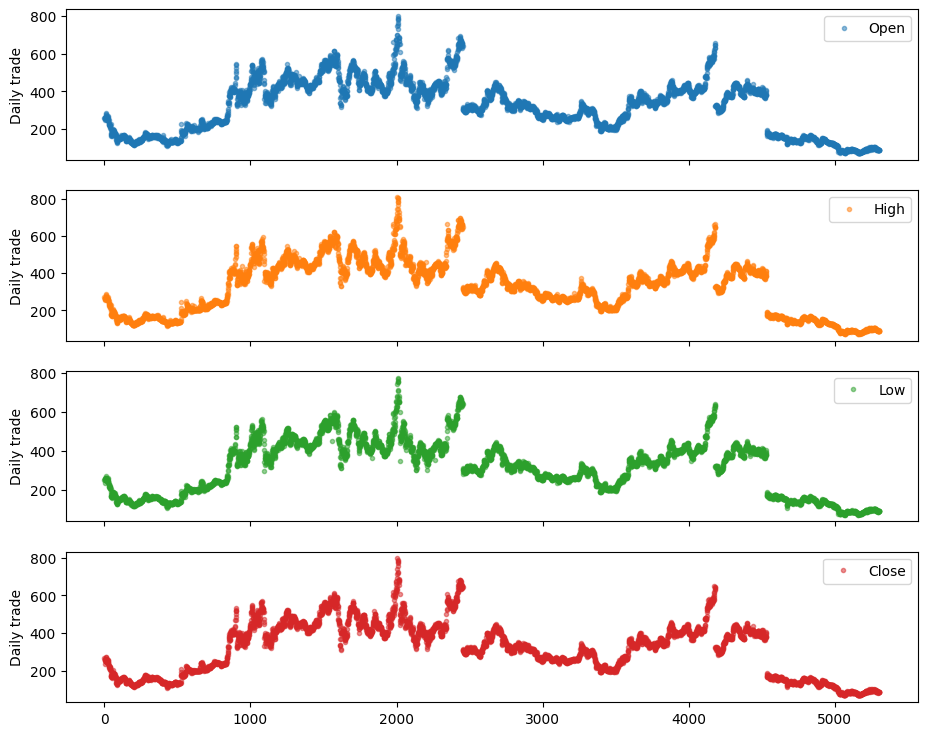

In [464]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

     Symbol Series  Prev Close    Open    High     Low    Last   Close  \
0       IOC     EQ      254.00  260.00  273.25  250.00  267.35  270.85   
1       IOC     EQ      270.85  260.00  268.00  254.10  267.00  264.40   
2       IOC     EQ      264.40  264.90  265.00  257.00  261.35  261.30   
3       IOC     EQ      261.30  258.00  263.00  256.05  263.00  260.10   
4       IOC     EQ      260.10  259.90  267.00  253.25  267.00  264.45   
...     ...    ...         ...     ...     ...     ...     ...     ...   
5301    IOC     EQ       88.05   88.70   88.80   87.75   88.20   88.20   
5302    IOC     EQ       88.20   88.20   89.10   88.20   88.90   88.85   
5303    IOC     EQ       88.85   89.20   89.55   89.00   89.30   89.40   
5304    IOC     EQ       89.40   90.25   90.50   88.70   88.75   88.90   
5305    IOC     EQ       88.90   88.60   93.10   88.00   90.80   90.85   

        VWAP    Volume      Turnover   Trades  Deliverable Volume  %Deliverble  
0     258.55     23700  6.1276

,count,mean,std,min,25%,50%,75%,max
Prev Close,5306.0,3.186134e+02,1.383144e+02,7.155000e+01,1.998500e+02,3.322500e+02,4.189500e+02,7.949500e+02
Open,5306.0,3.192170e+02,1.386569e+02,7.235000e+01,2.000000e+02,3.320000e+02,4.195750e+02,8.000000e+02
High,5306.0,3.247431e+02,1.414518e+02,7.340000e+01,2.020000e+02,3.380000e+02,4.269750e+02,8.100000e+02
Low,5306.0,3.133578e+02,1.357869e+02,7.115000e+01,1.977000e+02,3.260500e+02,4.121875e+02,7.755500e+02
Last,5306.0,3.186066e+02,1.383222e+02,7.150000e+01,1.997500e+02,3.320000e+02,4.189500e+02,7.930000e+02
Close,5306.0,3.185826e+02,1.383469e+02,7.155000e+01,1.998500e+02,3.322500e+02,4.189500e+02,7.949500e+02
VWAP,5306.0,3.191050e+02,1.386898e+02,7.256000e+01,1.998625e+02,3.318100e+02,4.199175e+02,7.898300e+02
Volume,5306.0,3.188201e+06,7.692790e+06,3.500000e+02,1.922215e+05,5.624070e+05,1.881595e+06,2.099291e+08
Turnover,5306.0,5.934325e+13,1.070842e+14,5.222700e+09,7.022101e+12,2.066347e+13,7.000699e+13,2.868430e+15
Trades,2456.0,4.021012e+04,3.640836e+04,3.080000e+02,1.164325e+04,3.041900e+04,5.911200e+04,3.798880e+05


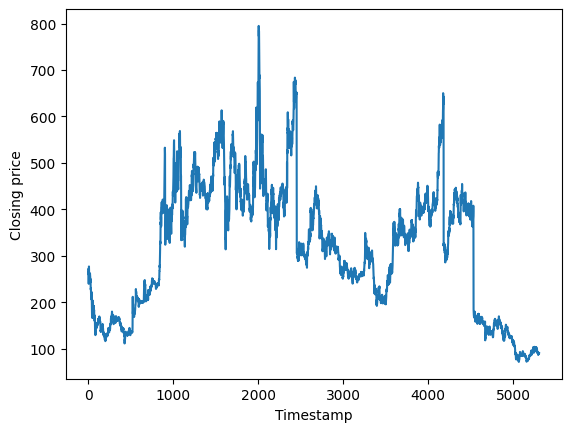

In [465]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

In [466]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

4163
1041


In [467]:
import keras
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten

#LSTM Model

lstm_1 = keras.layers.LSTM(16, activation='tanh', return_sequences=True, input_shape=(train_X.shape[1],100 ))

# Create the second LSTM layer
lstm_2 = keras.layers.LSTM(32, activation='tanh')


# Create the output layer
dense_layer = keras.layers.Dense(64, activation='relu')

# Stack the LSTM layers
model = keras.Sequential([lstm_1, lstm_2, dense_layer])



#DNN Model
model.add(Dense(64))
model.add(Activation('relu'))

###2nd layer
model.add(Dense(64))
model.add(Activation('relu'))

###3rd layer
model.add(Dense(64))
model.add(Activation('relu'))


model.add(Flatten())
#Final layers
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])
history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=64, verbose=1, shuffle =False)

Epoch 1/100
66/66 [==============================] - 4s 16ms/step - loss: 0.0253 - mse: 0.0253 - mae: 0.1075 - val_loss: 0.0063 - val_mse: 0.0063 - val_mae: 0.0554
Epoch 2/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0048 - mse: 0.0048 - mae: 0.0466 - val_loss: 0.0036 - val_mse: 0.0036 - val_mae: 0.0408
Epoch 3/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0031 - mse: 0.0031 - mae: 0.0357 - val_loss: 0.0035 - val_mse: 0.0035 - val_mae: 0.0435
Epoch 4/100
66/66 [==============================] - 0s 3ms/step - loss: 0.0025 - mse: 0.0025 - mae: 0.0316 - val_loss: 0.0025 - val_mse: 0.0025 - val_mae: 0.0357
Epoch 5/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0021 - mse: 0.0021 - mae: 0.0288 - val_loss: 0.0019 - val_mse: 0.0019 - val_mae: 0.0302
Epoch 6/100
66/66 [==============================] - 0s 4ms/step - loss: 0.0019 - mse: 0.0019 - mae: 0.0270 - val_loss: 0.0015 - val_mse: 0.0015 - val_mae: 0.0261
Epoch 7/100
66/66 [==

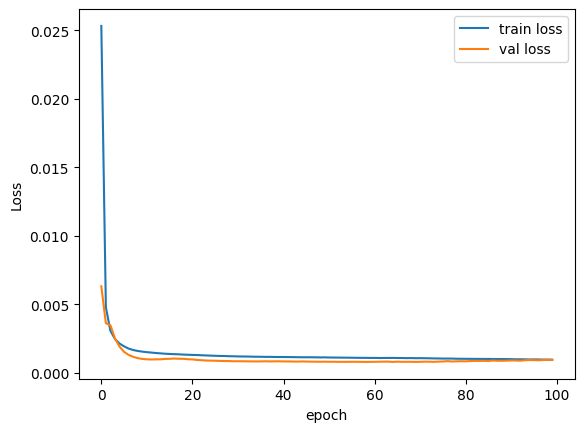

In [468]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

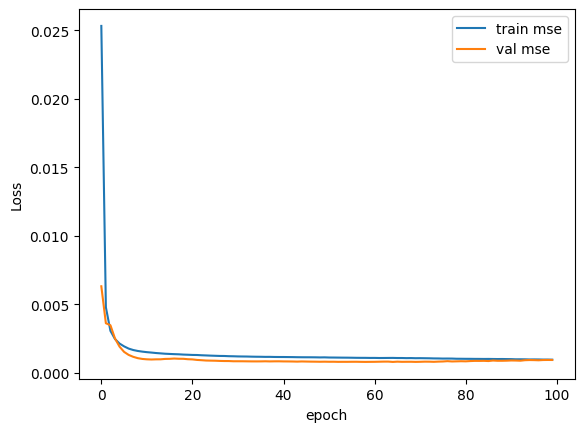

In [469]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

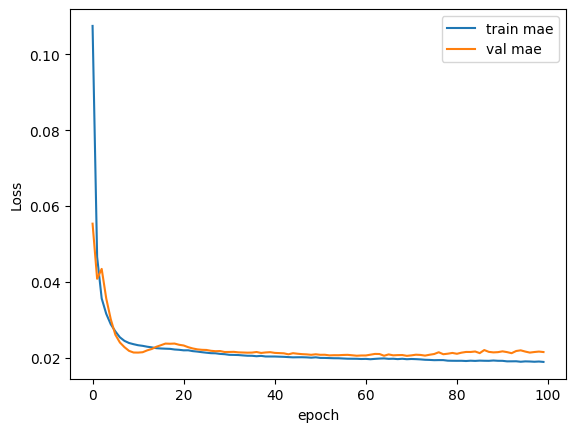

In [470]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_35 (LSTM)              (None, 32)                6272      
                                                                 
 dense_85 (Dense)            (None, 64)                2112      
                                                                 
 dense_86 (Dense)            (None, 64)                4160      
                                                                 
 activation_51 (Activation)  (None, 64)                0         
                                                                 
 dense_87 (Dense)            (None, 64)                4160      
                                                                 
 activation_52 (Activation)  (None, 64)              

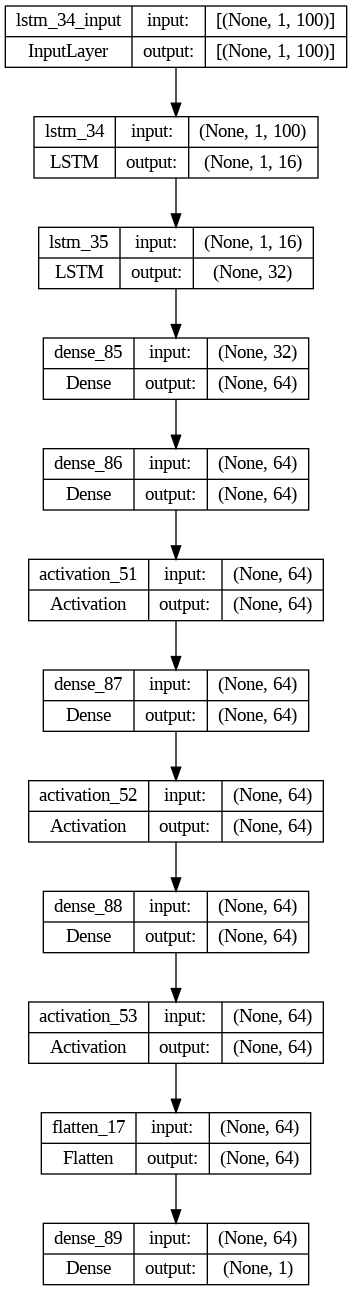

In [471]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

The Value used in Table for performance is from here

In [472]:
model.evaluate(test_X, test_Y)

33/33 [==============================] - 0s 1ms/step - loss: 9.4293e-04 - mse: 9.4293e-04 - mae: 0.0215


[0.000942929123993963, 0.000942929123993963, 0.021547550335526466]

In [473]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % r2)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.987029
R2 Score: 0.985660
Max Error: 0.332070


33/33 [==============================] - 0s 1ms/step


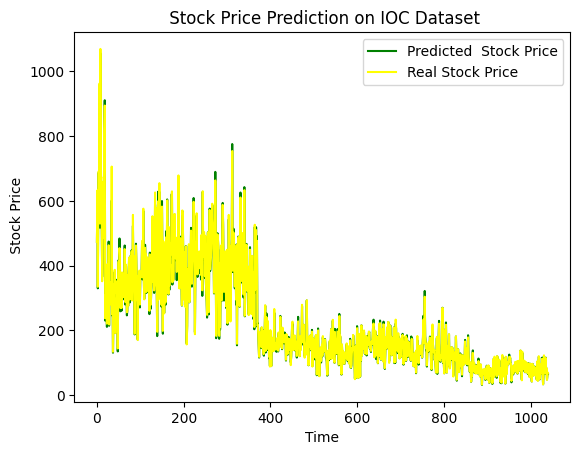

In [474]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'yellow', label = 'Real Stock Price')
plt.title(' Stock Price Prediction on IOC Dataset')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

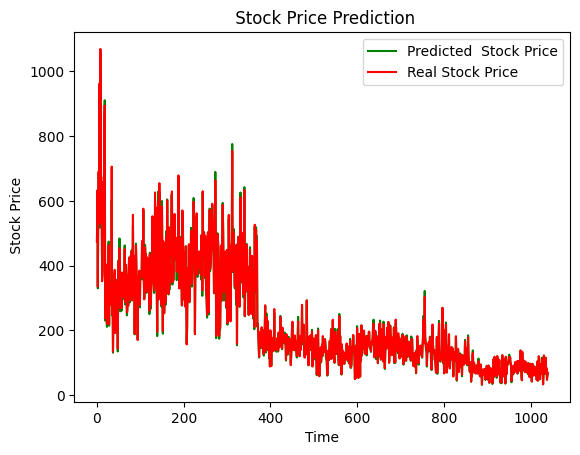

In [475]:
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

In [476]:
predicted

array([[473.2908  ],
       [625.334   ],
       [329.91928 ],
       ...,
       [ 48.68696 ],
       [ 62.72812 ],
       [ 64.751144]], dtype=float32)

In [477]:
test_label

array([[474.33230223],
       [632.18794788],
       [334.76769912],
       ...,
       [ 47.20662461],
       [ 62.75282277],
       [ 69.22772444]])

In [478]:
# Flatten the arrays
predicted_flat = [val[0] for val in predicted]
test_label_flat = [val[0] for val in test_label]

# Create a DataFrame
res = pd.DataFrame({

    'Actual Price': test_label_flat,
    'Predicted Price': predicted_flat,
})

# Display the DataFrame
print(res)

      Actual Price  Predicted Price
0       474.332302       473.290802
1       632.187948       625.333984
2       334.767699       329.919281
3       589.056782       586.807434
4       691.180769       687.153687
...            ...              ...
1036     73.350250        73.314507
1037     83.220588        82.612640
1038     47.206625        48.686958
1039     62.752823        62.728119
1040     69.227724        64.751144

[1041 rows x 2 columns]


In [479]:
from tabulate import tabulate
table = tabulate(res, headers='keys', tablefmt='pretty')
print(table)

+------+--------------------+--------------------+
|      |    Actual Price    |  Predicted Price   |
+------+--------------------+--------------------+
|  0   | 474.33230223123735 | 473.2908020019531  |
|  1   | 632.1879478827362  |   625.333984375    |
|  2   | 334.76769911504425 | 329.9192810058594  |
|  3   | 589.0567818696884  | 586.8074340820312  |
|  4   | 691.1807692307693  | 687.1536865234375  |
|  5   | 539.1546419454521  | 531.2152099609375  |
|  6   | 962.5597269624575  |  958.510498046875  |
|  7   | 529.9433284704297  | 517.0946655273438  |
|  8   | 1069.0498215701823 | 1055.717529296875  |
|  9   | 665.3205394190871  | 659.6895751953125  |
|  10  | 674.0478367633302  | 660.3560791015625  |
|  11  | 587.2096026490066  | 548.2656860351562  |
|  12  | 351.7456262149403  |   365.1513671875   |
|  13  | 385.3658838599487  | 390.1504821777344  |
|  14  | 658.1458533769481  |   647.380859375    |
|  15  | 485.95709563684443 | 492.4156494140625  |
|  16  | 630.6897910557184  | 6

In [480]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_34 (LSTM)              (None, 1, 16)             7488      
                                                                 
 lstm_35 (LSTM)              (None, 32)                6272      
                                                                 
 dense_85 (Dense)            (None, 64)                2112      
                                                                 
 dense_86 (Dense)            (None, 64)                4160      
                                                                 
 activation_51 (Activation)  (None, 64)                0         
                                                                 
 dense_87 (Dense)            (None, 64)                4160      
                                                                 
 activation_52 (Activation)  (None, 64)              

In [481]:
#from sklearn.metrics import accuracy_score

#accuracy = accuracy_score(test_Y, yhat_probs)
#print('Accuracy: {:.2f}'.format(accuracy))